This part uses the athlete data set in the file ALL-ATHLETES.csv. This dataset contains
information about athletes that participated in the London 2012 Olympics.

1. The data requires some cleaning. Make sure that you clean the data before working
on the rest of the problems. All solutions should start with the original dataset.
2. Produce a scatter plot of the athletes weight verses height.
3. Produce box plots of the following. How do the weights compare?
a. Female weights
b. Male weights
c. Weight of the male metal winners
d. Weight of the female metal winners
4. Produce separate swarm plots of the ages of male metal winners and the female
metal winners. How do the weights compare?
5. Produce separate violin plots for the ages of the athletes in Archery, Sailing, and
Swimming. How do the ages compare?
6. Produce a histogram of the metals won per country, sorted by the number of metals
won.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
data= pd.read_csv("ALL-ATHLETES.csv",parse_dates=['Date of birth'])

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 14 columns):
Name              10384 non-null object
Country           10384 non-null object
Age               10384 non-null int64
Height, cm        9823 non-null float64
Weight            9104 non-null float64
Sex               10384 non-null object
Date of birth     10384 non-null object
Place of birth    7694 non-null object
Gold              10384 non-null int64
Silver            10384 non-null int64
Bronze            10384 non-null int64
Total             10384 non-null int64
Sport             10384 non-null object
Event             10384 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [66]:
data.head()

,Name,Country,Age,"Height, cm",Weight,Sex,Date of birth,Place of birth,Gold,Silver,Bronze,Total,Sport,Event
0,Lamusi A,People's Republic of China,23,170.0,60.0,M,6/2/1989,NEIMONGGOL (CHN),0,0,0,0,Judo,Men's -60kg
1,A G Kruger,United States of America,33,193.0,125.0,M,2/18/1979,Sheldon (USA),0,0,0,0,Athletics,Men's Hammer Throw
2,Jamale Aarrass,France,30,187.0,76.0,M,11/15/1981,BEZONS (FRA),0,0,0,0,Athletics,Men's 1500m
3,Abdelhak Aatakni,Morocco,24,NaN,NaN,M,2/9/1988,AIN SEBAA (MAR),0,0,0,0,Boxing,Men's Light Welter (64kg)
4,Maria Abakumova,Russian Federation,26,178.0,85.0,F,1/15/1986,STAVROPOL REGION (RUS),0,0,0,0,Athletics,Women's Javelin Throw


In [67]:
data.isnull().sum()

Name                 0
Country              0
Age                  0
Height, cm         561
Weight            1280
Sex                  0
Date of birth        0
Place of birth    2690
Gold                 0
Silver               0
Bronze               0
Total                0
Sport                0
Event                0
dtype: int64

Q1. The data requires some cleaning. Make sure that you clean the data before working on the rest of the problems. All solutions should start with the original dataset.

In [68]:
#fixing the missing values from weight and height based on their gender's mean value

data['Weight']=data.groupby('Sex')['Weight'].transform(lambda x: x.fillna(round(x.mean(),2)))
data['Height, cm']=data.groupby('Sex')['Height, cm'].transform(lambda x: x.fillna(round(x.mean(),1)))

In [69]:
data.isnull().sum()

Name                 0
Country              0
Age                  0
Height, cm           0
Weight               0
Sex                  0
Date of birth        0
Place of birth    2690
Gold                 0
Silver               0
Bronze               0
Total                0
Sport                0
Event                0
dtype: int64

Q2. Produce a scatter plot of the athletes weight verses height.

Observations: From the below plot we can see the obvious correlation between height and weight and we can also confirm that male tend to be heavier and taller compared to female.

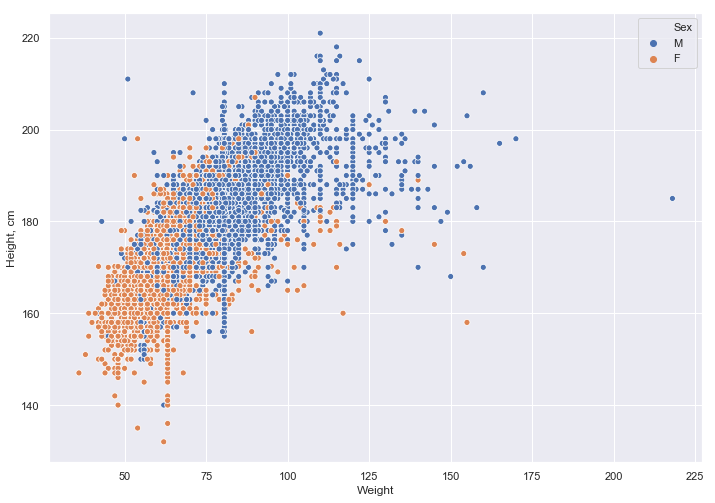

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='Weight', y='Height, cm', data = data, hue='Sex')

3. Produce box plots of the following. How do the weights compare?<br>
a. Male weights <br>
b. Female weights<br>
c. Weight of the male metal winners<br>
d. Weight of the female metal winners <br>

Observations:

[Text(0,0.5,'Weights'), Text(0.5,0,'Weight Categories')]

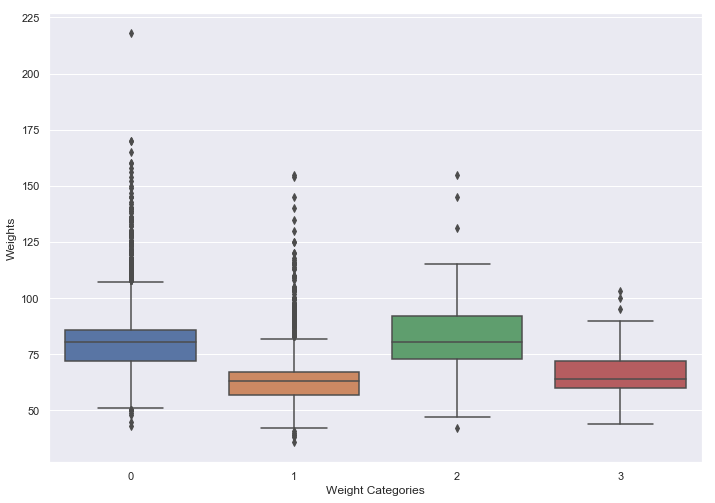

In [71]:
a=data[(data['Total'] == 0) & (data['Sex']=='M')]['Weight']
b=data[(data['Total'] == 0) & (data['Sex']=='F')]['Weight']
c=data[(data['Total'] > 0) & (data['Sex']=='M')]['Weight']
d=data[(data['Total'] > 0) & (data['Sex']=='F')]['Weight']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=[a,b,c,d]).set(xlabel='Weight Categories', ylabel='Weights')

4. Produce separate swarm plots of the ages of male metal winners and the female
metal winners. How do the weights compare?

Observations:
Females seem to be starting early in the olympics at the age of 15 whereas males start a bit late around age of 17. Almost equal of population is seen between age of 20-30. Relatively large number of male continue with olympics after the age of 40 as well.

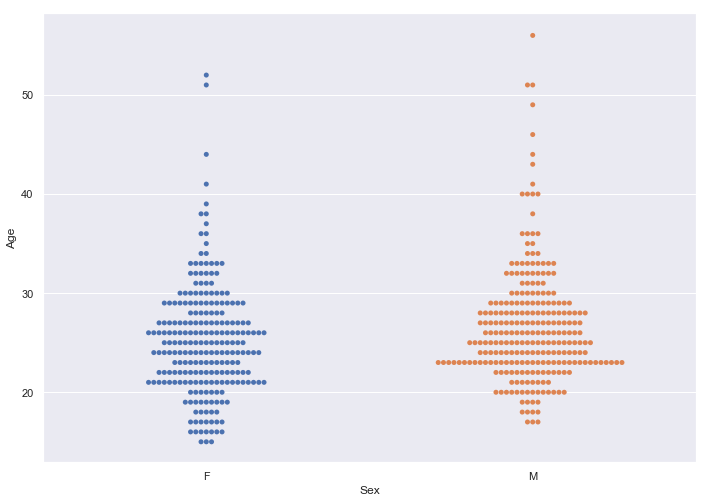

In [72]:
d=data[data.Total>0]
sns.swarmplot(x='Sex',y='Age',data=d)

5. Produce separate violin plots for the ages of the athletes in Archery, Sailing, and
Swimming. How do the ages compare?

Observations: From the below plot we can find 3 conclusions:
1. Swimming has the highest number of individuals and most of them range from the age of 17-28. There are some swimmers that are younger than age of 15 where as none of the swimmer is more than age of 40.
2. Sailers are atleast aged 18 and the oldest sailer is around 50 years of age.
3. Archary has the lowest number of people involved and most of the archers are aged between 17-27.

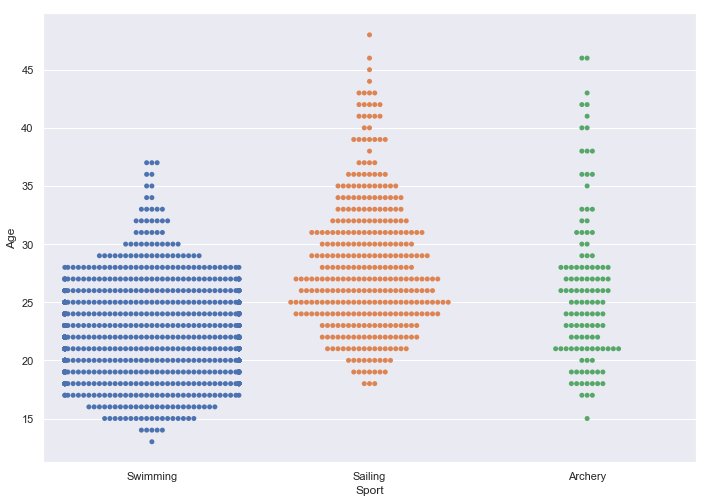

In [73]:
d1=data[data.Sport.isin(['Archery','Sailing','Swimming'])]
sns.swarmplot(x='Sport',y='Age',data=d1)

6. Produce a histogram of the metals won per country, sorted by the number of metals
won.

Observations: From the below plot we can see that the highest number of medals are achieved by USA followed by China

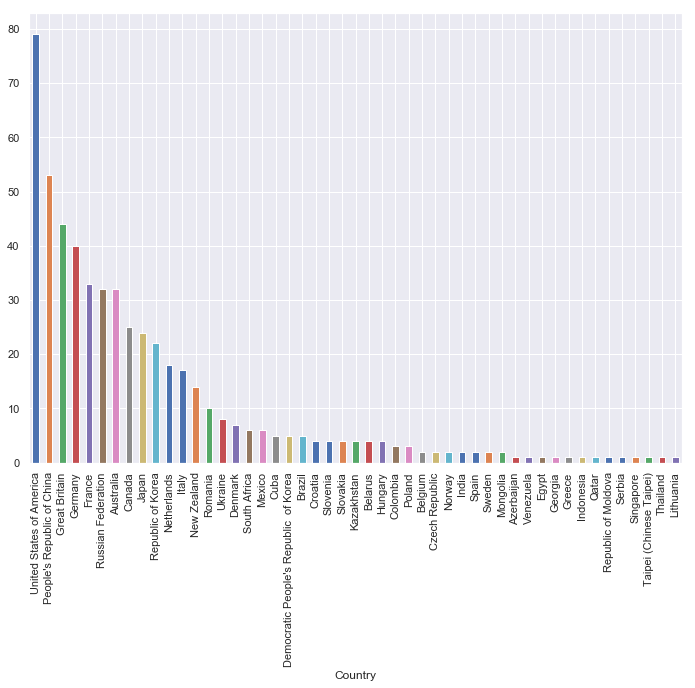

In [74]:
d2=data[data.Total>0].groupby('Country')['Total'].sum().sort_values(ascending=False)
d2.plot.bar()